# *Machine Learning e Data Sciente - Python na Prática*

### *Importação das bibliotecas básicas*

In [160]:
# %pip install plotly --upgrade

In [161]:
# %pip install pandas
# %pip install numpy
# %pip install seaborn
# %pip install matplotlib.pyplot
# %pip install plotly.express

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [163]:
base_credit = pd.read_csv('C:/Users/bruno/Downloads/ML/Bases de dados/credit_data.csv')

In [164]:
#base_credit.head(10) ## Retorna os primeiros registros
#base_credit.tail(10) ## Retorna os últimos registros

In [165]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [166]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

<Axes: xlabel='default', ylabel='count'>

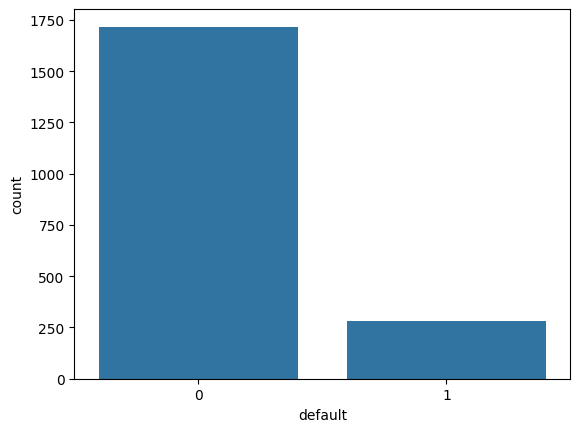

In [167]:
sns.countplot(x = base_credit['default'])

(array([  1.,   1.,   1.,   0.,   0.,   0., 499., 467., 514., 514.]),
 array([-52.42327992, -40.78377234, -29.14426477, -17.50475719,
         -5.86524962,   5.77425796,  17.41376554,  29.05327311,
         40.69278069,  52.33228827,  63.97179584]),
 <BarContainer object of 10 artists>)

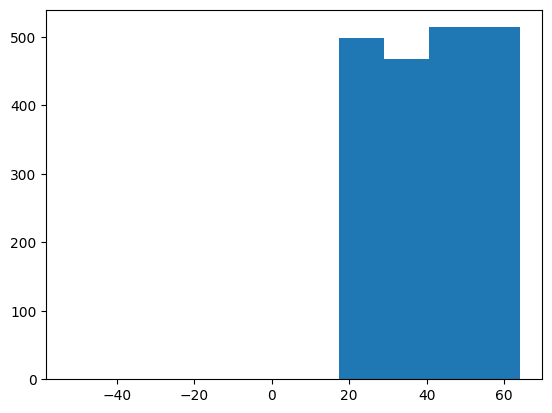

In [168]:
plt.hist(x = base_credit['age'])

(array([189., 198., 199., 179., 204., 209., 206., 199., 219., 198.]),
 array([20014.48947005, 25012.60908088, 30010.7286917 , 35008.84830253,
        40006.96791336, 45005.08752419, 50003.20713501, 55001.32674584,
        59999.44635667, 64997.5659675 , 69995.68557832]),
 <BarContainer object of 10 artists>)

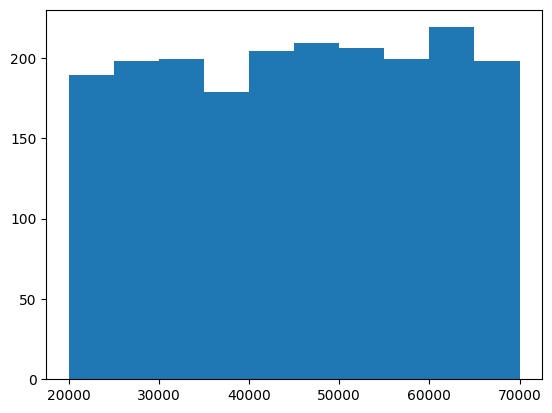

In [169]:
plt.hist(x = base_credit['income'])

(array([345., 373., 318., 277., 266., 171., 104.,  89.,  40.,  17.]),
 array([1.37762959e+00, 1.37784499e+03, 2.75431235e+03, 4.13077971e+03,
        5.50724707e+03, 6.88371443e+03, 8.26018180e+03, 9.63664916e+03,
        1.10131165e+04, 1.23895839e+04, 1.37660512e+04]),
 <BarContainer object of 10 artists>)

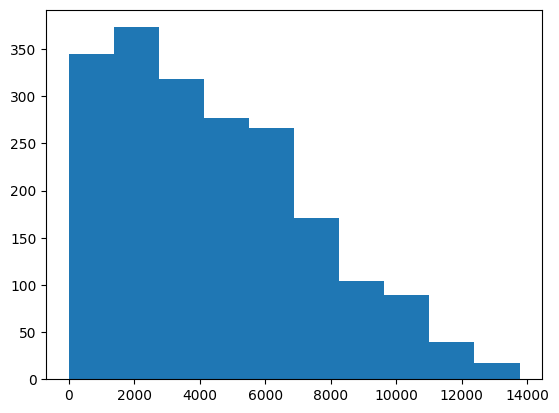

In [170]:
plt.hist(x = base_credit['loan'])

# *Tratamento de valores inconsistentes*

In [171]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [172]:
# # Apagar a coluna inteira(de todos os registros da base de dados)
# base_credit_2 = base_credit.drop('age', axis = 1)
# base_credit_2

In [173]:
# # Apagar a linha inteira(de todos os registros inconsistentes)
# base_credit_3 = base_credit.drop(base_credit[base_credit['age'] <= 0].index)
# base_credit_3

In [174]:
# Preencher os valores inconsistentes com a média
base_credit.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [175]:
base_credit['age'] [base_credit['age'] > 0].mean()

np.float64(40.92770044906149)

In [176]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

# *Tratamento de valores faltantes*

In [177]:
base_credit.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [178]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [179]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [180]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

C:\Users\bruno\AppData\Local\Temp\ipykernel_5932\1787667511.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)


In [181]:
base_credit.loc[(base_credit['clientid'] == 29)]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0


# *Divisão entre previsores e classe*

In [182]:
X_credit = base_credit.iloc[:, 1:4].values

In [183]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [184]:
type(X_credit)

numpy.ndarray

In [185]:
Y_credit = base_credit.iloc[:, 4].values

In [186]:
Y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [187]:
type(Y_credit)

numpy.ndarray

# *Escalonamento dos valores*

In [188]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(np.float64(20014.4894700497),
 np.float64(18.055188510566897),
 np.float64(1.37762959325451))

In [189]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(np.float64(69995.6855783239),
 np.float64(63.971795841120205),
 np.float64(13766.0512393337))

In [190]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [191]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

# *Divisão das bases em treinamento e teste*

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_credit_treinamento, X_credit_teste, Y_credit_treinamento, Y_credit_teste = train_test_split(X_credit, Y_credit, test_size = 0.25, random_state = 0)

In [194]:
X_credit_treinamento.shape

(1500, 3)

In [195]:
Y_credit_treinamento.shape

(1500,)

# *Salvar Variáveis*

In [196]:
import pickle

In [197]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste], f)